**Exploratory Data Analysis Project on the Gym**

## **Introduction to my Research Space**
Due to my passion about fitness, mainly surrounding strength training, I have chosen to do my project about the gym and the different varieties of workouts. In recent years, fitness has become a cornerstone of personal well-being, with gyms serving as hubs for individuals pursuing diverse fitness goals. The appeal of gyms lies in their variety of equipment and exercises, catering to both beginners and seasoned fitness enthusiasts. From strength training with weights to cardio and plyometrics, the diversity of exercises ensures a tailored fitness experience for everyone.

### **Aims and Objectives**
To analyze gym exercises, associated equipment, and difficulty levels to provide insights into workout trends and equipment accessibility for varied fitness levels.

### **Acquire a Dataset**
I will be obtaining my dataset from the online platform, Kaggle, for a thorough analysis, ensuring that it contains all the necessary fields.

### **Utilise the Dataset**
The dataset will be used to visualise the different relationships between various fields with a clear descriptions of the findings.

### **Writing Method to Communicate Ideas and Concepts**
Concise, well-structured writing will be used in Markdown cells in this Jupyter Notebook to ensure clarity analysis. Headings, explanations and Graphs will be included.

### **Summary of the Area of Research**
My project will be aligned around finding out more about the different training forms, exercises, the muscle group it targets, equipments required, level of difficulty and rating of exercises. The relations between these different fields will be explored to provide gym go-ers with a better idea of which exercises are more beneficial to which body parts. Furthermore, it will be helpful for beginners at the gym to plan out their new workout routins based off this analysis.

### **Import Requirements**

In [551]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns

import os
print(os.getcwd())

C:\Users\Hams\pwd midterm


## **Relevancy of Data and Justification of Data Source**

### **Origin of Data**
The dataset used in this project is obtained from Kaggle, a widely recognised platform for datasets, machine learning and data science competitions. The dataset was titled "Gym Exercise Dataset".

### **Why the Data Source is Appropriate**
The Kaggle dataset is relevant and aligns with the research topic that I am focusing on with all the necessary fields. It provides comprehensive and structured information to support my objectives.

### **Identifiable Case for Working with this Data**
The content in the dataset aligns closely with the research analysis topic. This can be seen from how it includes clearly labelled columns such as "Title" for the exercises, "Type" for the training forms, "Bodypart" for the muscle group it targets and more.

### **Format of Data and Suitability for Analysis**
Dataset is provided in CSV format which is ideal for data analysis. Hence, it can be easily imported and converted to DataFrame for efficient manipulation.

### **Consideration of Other Datasets**
Dataset from MyFitnessPal, a fitness app and from the Government database like National Health were considered. Although the fitness app would provide rich user-generated data and biometric data, it does not focus exclusively on gym workouts which would be irrelevant. The Government database provides highly reliable data with large sample size but focuses more on health outcomes rather than the specific gym exercises and equipments. Therefore, the Kaggle dataset was the better option.

In [554]:
gym_data = pd.read_csv('megaGymDataset.csv')
gym_data.columns = gym_data.columns.str.replace('Unnamed: 0', 'index')
gym_data

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2913,2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average
2914,2914,Lying Close-Grip Barbell Triceps Press To Chin,NaN,Strength,Triceps,E-Z Curl Bar,Beginner,8.1,Average
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2916,2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN


## **Project Background**

### **Why the field is of interest**
This field about gym and fitness is  significant due to the increasing emphasis on physical health and personal well-being in modern society. The exploration about the different exercises will prove to be useful for gym go-ers, especially beginners who do not know where to start.

### **Previous exploration**
Even though studies have explored general fitness trends, the specific intersection of these field that I am looking at remains underexplored. As a result, this project addresses that gap.

### **Scope of work**
The project will focus on aspects related to the exercises, target muscle groups and level of fitness but will not delve into other aspects such as user-specific biometric data such as heart rate or calories burned.

### **Steps in the Analytical Data Processing Pipeline**
1. Obtain the dataset from Kaggle and look for relevancy and quality
2. Clean the data for any missing values and consistent formatting
3. Group the different data fields to identify patterns
4. Visualise the data trends and relationships
5. Summarise the findings and present insights found from the dataset
6. Form conclusions based off the dataset

### **Evaluation of aims and objectives**
Using the visualisation formed from the data analysis, I will draw conclusions which will address the research topic.

## **Technical Exploration of Dataset**

### **Data Cleaning**

In [558]:
missing_values_count = gym_data.isnull().sum()
missing_values_count

index            0
Title            0
Desc          1550
Type             0
BodyPart         0
Equipment       32
Level            0
Rating        1887
RatingDesc    2056
dtype: int64


Since the only columns with missing data are from decription, rating and rating description, these data are not necessary and hence the data does not have to be altered.

### **Data Types**

In [561]:
gym_data.dtypes

index           int64
Title          object
Desc           object
Type           object
BodyPart       object
Equipment      object
Level          object
Rating        float64
RatingDesc     object
dtype: object

### **Number of rows and columns**

In [563]:
print("Number of row:\t" + str(gym_data.shape[0]))
print("Number of col:\t" + str(gym_data.shape[1]))

Number of row:	2918
Number of col:	9


## **Ethics Use of Data**

### **Where the Data Comes from**
The dataset is sourced from Kaggle, which is an open platform and is publicly available under the licensing terms specified on the platform, which permit its use for non-commercial research and analysis.

### **Considerations about Usage and Reusability**
The analysis aims to generate insights into the gym workouts, potentially creating intellectual property in the form of the visualisations. Attribution is ensured by clearly acknowledging the original dataset source.

### **Considerations around Implications of Data Utilisation**
The purpose of this to only to explore general trends and results are presented in a neutral manner, avoiding any biases about fitness. It is to be known that there is intention to ensure that no harmful assumptions will be made.

### **Considerations of the Data Processing Pipeline**
The data is readily accessible and stored in a CSV file, making it suitable for analysis. Furthermore, every step is documented ensuring that the analysis can be traced and verified.

### **Potential Biases of Dataset**
There is a large varierty of different types in each column or field of the dataset and hence will have mininal biases.

### **Exploratory Data Analysis**

I am going to find out which muscle group has the most amount of exercises.

In [567]:
count_exercises = gym_data.groupby(['BodyPart']).count()
count_exercises

,index,Title,Desc,Type,Equipment,Level,Rating,RatingDesc
BodyPart,,,,,,,,
Abdominals,662,662,298,662,659,662,112,94
Abductors,21,21,8,21,21,21,10,9
Adductors,17,17,7,17,15,17,13,10
Biceps,168,168,101,168,168,168,55,53
Calves,47,47,26,47,44,47,26,26
Chest,262,262,149,262,262,262,113,90
Forearms,31,31,16,31,30,31,24,23
Glutes,81,81,29,81,81,81,25,22
Hamstrings,121,121,50,121,115,121,85,71


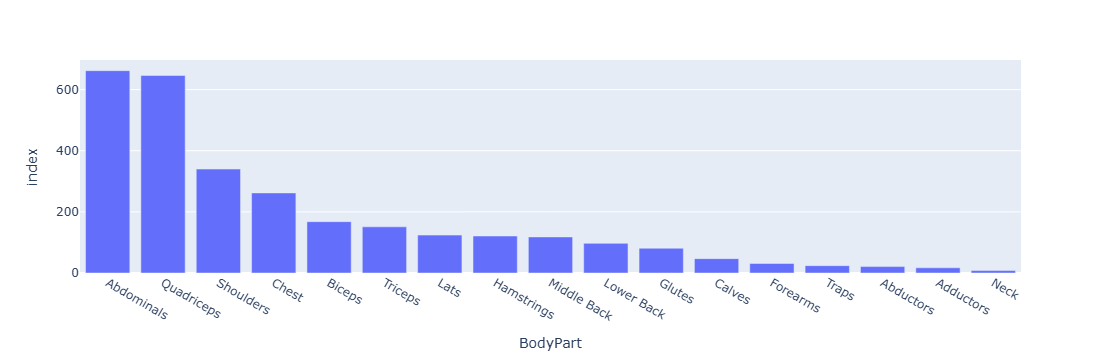

In [568]:
count_exercises= count_exercises.sort_values(by='index', ascending=False)
fig = px.bar(count_exercises, x=count_exercises.index, y='index')
fig.show()

Based off this analysis, it is very obvious that "abdominals" muscle group have the highest amount of exercises, followed by "quadriceps", then "shoulders". Hence, abdominals, quadriceps and shoulders are the top 3 muscle groups with the most amount of exercises. Furthermore, the muscle groups with the lowest amount of exercises are neck, adductors and abductors respectively. 

### **Dataset for Beginners**

In [571]:
beginner = gym_data[gym_data.Level == 'Beginner']
beginner

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
11,11,Bench barbell roll-out,The bench barbell roll-out is a challenging ex...,Strength,Abdominals,Barbell,Beginner,8.3,Average
12,12,Barbell Side Bend,NaN,Strength,Abdominals,Barbell,Beginner,7.0,Average
20,20,Advanced Kettlebell Windmill,NaN,Strength,Abdominals,Kettlebells,Beginner,8.3,Average
22,22,Kettlebell Pass Between The Legs,NaN,Strength,Abdominals,Kettlebells,Beginner,7.3,Average
40,40,Dumbbell spell caster,The dumbbell spell caster is an exercise that ...,Strength,Abdominals,Dumbbell,Beginner,9.3,Average
...,...,...,...,...,...,...,...,...,...
2841,2841,Low Cable Triceps Extension,NaN,Strength,Triceps,Cable,Beginner,8.2,Average
2889,2889,Standing Towel Triceps Extension,NaN,Strength,Triceps,Body Only,Beginner,6.5,Average
2892,2892,Overhead Triceps,NaN,Stretching,Triceps,Body Only,Beginner,3.3,Average
2910,2910,Supine Chest Throw,NaN,Plyometrics,Triceps,Medicine Ball,Beginner,8.2,Average


Based off experience and from what I have heard from others, most beginners including myself when I initially got into fitness, started off with no equipments or minimal equipments such as just a few pairs of dumbbells. Especially during COVID, home workouts were extremely popularised due to the closure of gyms.

In [573]:
body_only =beginner[beginner.Equipment == 'Body Only']
body_only

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
194,194,Gorilla Chin/Crunch,NaN,Strength,Abdominals,Body Only,Beginner,9.0,Average
202,202,Crunch - Hands Overhead,NaN,Strength,Abdominals,Body Only,Beginner,8.6,Average
204,204,Stomach Vacuum,NaN,Stretching,Abdominals,Body Only,Beginner,8.5,Average
208,208,Butt-Ups,NaN,Strength,Abdominals,Body Only,Beginner,8.3,Average
217,217,Janda Sit-Up,NaN,Strength,Abdominals,Body Only,Beginner,7.4,Average
...,...,...,...,...,...,...,...,...,...
2175,2175,Slow Jog,NaN,Cardio,Quadriceps,Body Only,Beginner,0.0,NaN
2178,2178,Square Hop,NaN,Plyometrics,Quadriceps,Body Only,Beginner,0.0,NaN
2731,2731,Seated Front Deltoid,NaN,Stretching,Shoulders,Body Only,Beginner,4.5,Average
2889,2889,Standing Towel Triceps Extension,NaN,Strength,Triceps,Body Only,Beginner,6.5,Average


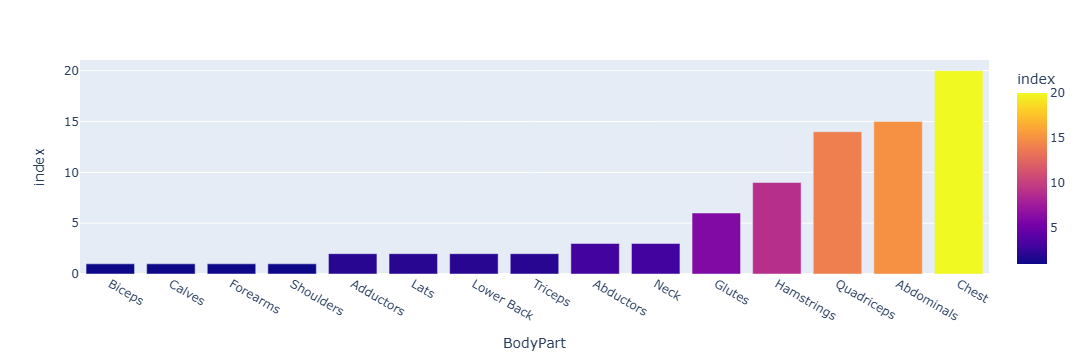

In [574]:
beginner_bodyOnly = body_only.groupby(['BodyPart']).count()
beginner_bodyOnly= beginner_bodyOnly.sort_values(by='index')
fig = px.bar(beginner_bodyOnly, x=beginner_bodyOnly.index, y='index', color ='index')
fig.show()

From this, it can be seen that Chest, Abdominals and Quadriceps have the highest number of exercises while Biceps, Calves and Forearms have the lowest.

Now I will look at beginners who started off with just Dumbbells.

In [577]:
dumbbell =beginner[beginner.Equipment == 'Dumbbell']
dumbbell

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
40,40,Dumbbell spell caster,The dumbbell spell caster is an exercise that ...,Strength,Abdominals,Dumbbell,Beginner,9.3,Average
731,731,Incline Hammer Curls,NaN,Strength,Biceps,Dumbbell,Beginner,9.5,Average
733,733,Biceps curl to shoulder press,The biceps curl to shoulder press is a dumbbel...,Strength,Biceps,Dumbbell,Beginner,9.1,Average
735,735,Flexor Incline Dumbbell Curls,NaN,Strength,Biceps,Dumbbell,Beginner,9.0,Average
737,737,Cross-body hammer curl,The cross-body hammer curl is a dumbbell exerc...,Strength,Biceps,Dumbbell,Beginner,8.9,Average
741,741,Standing concentration curl,The standing concentration curl is a variation...,Strength,Biceps,Dumbbell,Beginner,8.7,Average
745,745,Preacher Hammer Dumbbell Curl,NaN,Strength,Biceps,Dumbbell,Beginner,8.6,Average
747,747,Lying Supine Dumbbell Curl,NaN,Strength,Biceps,Dumbbell,Beginner,8.3,Average
748,748,Standing Dumbbell Reverse Curl,"With the reverse-grip dumbbell curl, the palms...",Strength,Biceps,Dumbbell,Beginner,8.1,Average
749,749,Palms-out incline biceps curl,The palms-out incline biceps curl is an exerci...,Strength,Biceps,Dumbbell,Beginner,8.0,Average


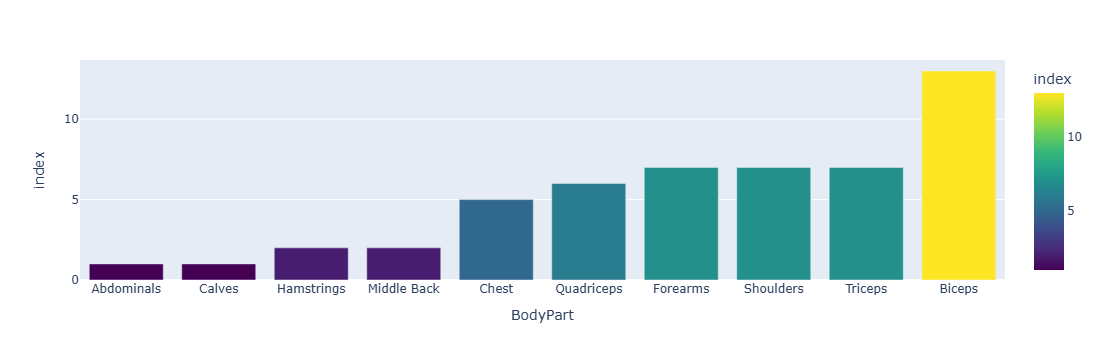

In [578]:
beginner_dumbbell = dumbbell.groupby(['BodyPart']).count()
beginner_dumbbell= beginner_dumbbell.sort_values(by='index')
fig = px.bar(beginner_dumbbell, x=beginner_dumbbell.index, y='index', color ='index', color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

This shows that for exercises done by beginners with dumbbells, the number of exercises for each muscle group is totally different. The highest number of exercises are for Biceps while the lowest is for Abdominals. This is very interesting to note, since for no equipment, the one with the second most exercises was Abdominals while the one with lowest number of exercises was biceps. This is the complete opposite of each other.

### **Types of Training and the Target Bodypart**

Now let's group the data based off the type of training form and bodypart it targets.

In [582]:
bodyPart_dist=gym_data.groupby(['Type','BodyPart']).count()
bodyPart_dist

index  Title  Desc  Equipment  Level  Rating  \
Type      BodyPart                                                    
Cardio    Abdominals       2      2     0          2      2       0   
          Calves           1      1     0          1      1       0   
          Chest            1      1     0          1      1       0   
          Hamstrings       1      1     1          1      1       1   
          Middle Back      1      1     1          1      1       1   
...                      ...    ...   ...        ...    ...     ...   
Strongman Forearms         2      2     1          2      2       2   
          Hamstrings       1      1     0          1      1       1   
          Lower Back       4      4     0          4      4       4   
          Quadriceps      10     10     3         10     10      10   
          Shoulders        4      4     0          4      4       4   

                       RatingDesc  
Type      BodyPart                 
Cardio    Abdominals            0  
          Calves                0  
          Chest                 0  
          Hamstrings            1  
          Middle Back           1  
...                           ...  
Strongman Forearms              2  
          Hamstrings            1  
          Lower Back            4  
          Quadriceps            8  
          Shoulders             4  

[65 rows x 7 columns]

I will now be regrouping explicitly by index levels and perform aggregration(sum()). This ensures that if there were any duplicate rows or unintentended multi-grouping, the values are summed up.

In [584]:
bodyPart_dist=bodyPart_dist.groupby(level=[0,1]).sum()
bodyPart_dist

index  Title  Desc  Equipment  Level  Rating  \
Type      BodyPart                                                    
Cardio    Abdominals       2      2     0          2      2       0   
          Calves           1      1     0          1      1       0   
          Chest            1      1     0          1      1       0   
          Hamstrings       1      1     1          1      1       1   
          Middle Back      1      1     1          1      1       1   
...                      ...    ...   ...        ...    ...     ...   
Strongman Forearms         2      2     1          2      2       2   
          Hamstrings       1      1     0          1      1       1   
          Lower Back       4      4     0          4      4       4   
          Quadriceps      10     10     3         10     10      10   
          Shoulders        4      4     0          4      4       4   

                       RatingDesc  
Type      BodyPart                 
Cardio    Abdominals            0  
          Calves                0  
          Chest                 0  
          Hamstrings            1  
          Middle Back           1  
...                           ...  
Strongman Forearms              2  
          Hamstrings            1  
          Lower Back            4  
          Quadriceps            8  
          Shoulders             4  

[65 rows x 7 columns]

Since the data is clean and already properly grouped by the first operation, there is no difference in the output.

In [586]:
allTypes =(gym_data["Type"].unique())
len(allTypes)


7

In [587]:
print(allTypes)

['Strength' 'Plyometrics' 'Cardio' 'Stretching' 'Powerlifting' 'Strongman'
 'Olympic Weightlifting']


Now we know that there are 7 different types of exercise forms and the list of what they are.

In [589]:
typeDfs = []
for i in range(7):
    typeDfs.append(bodyPart_dist.iloc[bodyPart_dist.index.get_level_values('Type') == allTypes[i]])

In [590]:
cardio =bodyPart_dist.iloc[bodyPart_dist.index.get_level_values('Type') == 'Cardio']

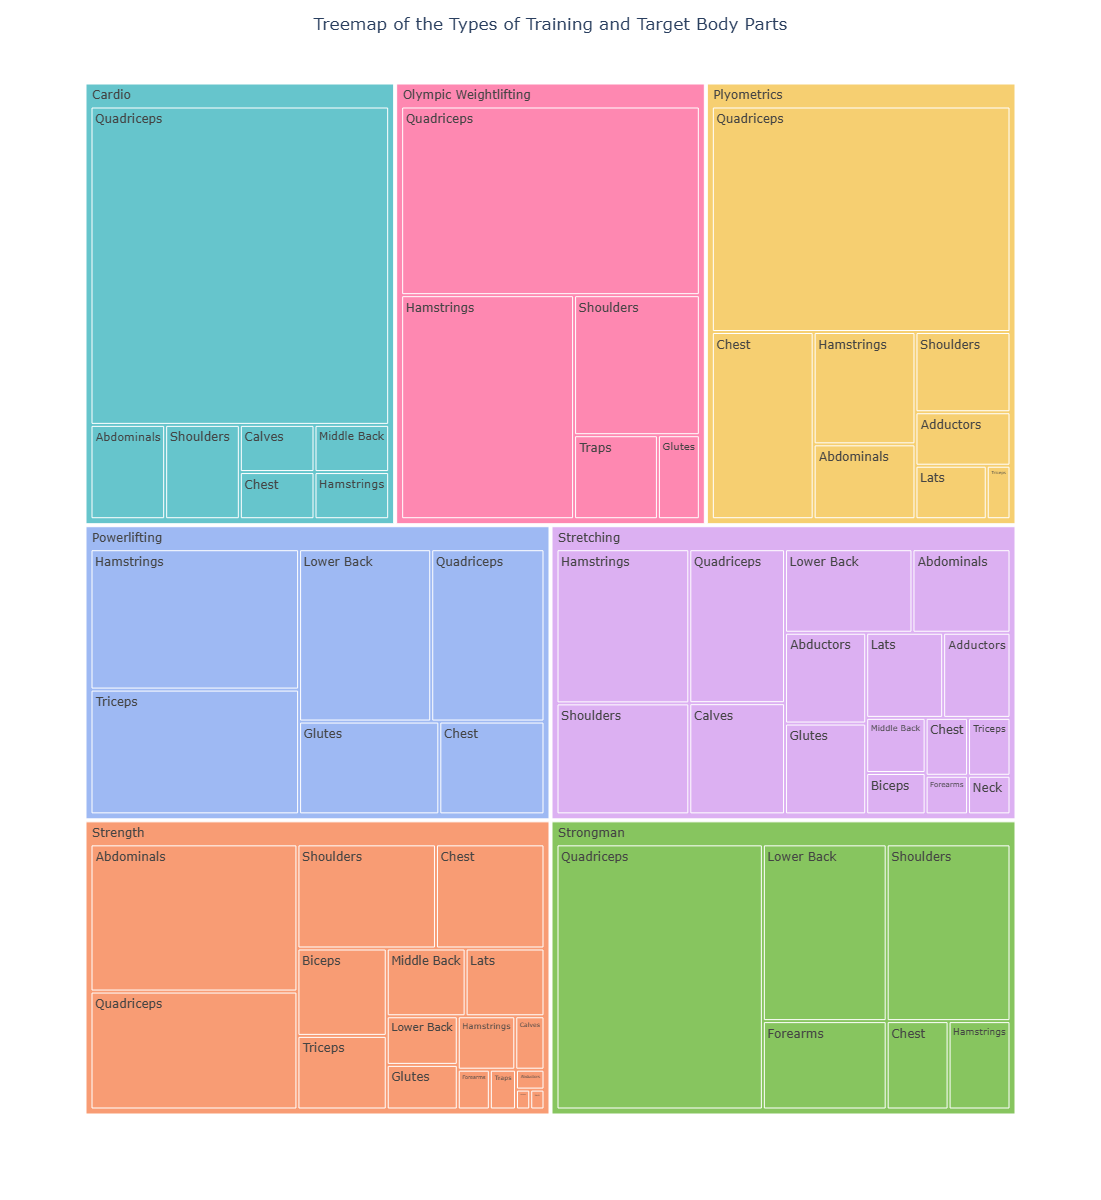

In [591]:
sunburst_data = bodyPart_dist.reset_index()  # Resets index to make 'Type' a column if it's an index level

# Calculate percentage
sunburst_data['percentage'] = sunburst_data.groupby('Type')['index'].transform(lambda x: (x / x.sum()) * 100)

# Create treemap
fig = px.treemap(
    sunburst_data,
    path=["Type", "BodyPart"],  # Hierarchy: Type -> BodyPart
    values="percentage",       # Use percentages as values
    color="Type",              # Color by Type
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_layout(
    height=1200,
    width=1000,
    title_text="Treemap of the Types of Training and Target Body Parts",
    title_x=0.5
)

fig.show()

From the treemap above, I can deduce some things:
- Quadriceps are one of the muscle groups that are heavily targetted since it has the highest percentage in Cardio, Olympic Lifting, Plyometrics, Strength and Strongman.
- Powerlifting consists of 3 main exercises which are Deadlift, Squat and Bench Press. Hence as expected, the workouts target hamstrings, triceps, lower back, quadriceps, glutes and chest. Abdominals are not a part of it as they do not have to be separately trained when training for these 3 main lifts. Furthermore, this could be why not many powerlifters have six pack abs since it is not a necessity for them.
- In comparison with all the other training forms, the distribution of exercises is the most uniform for stretching.

### **Top Rated Exercises**

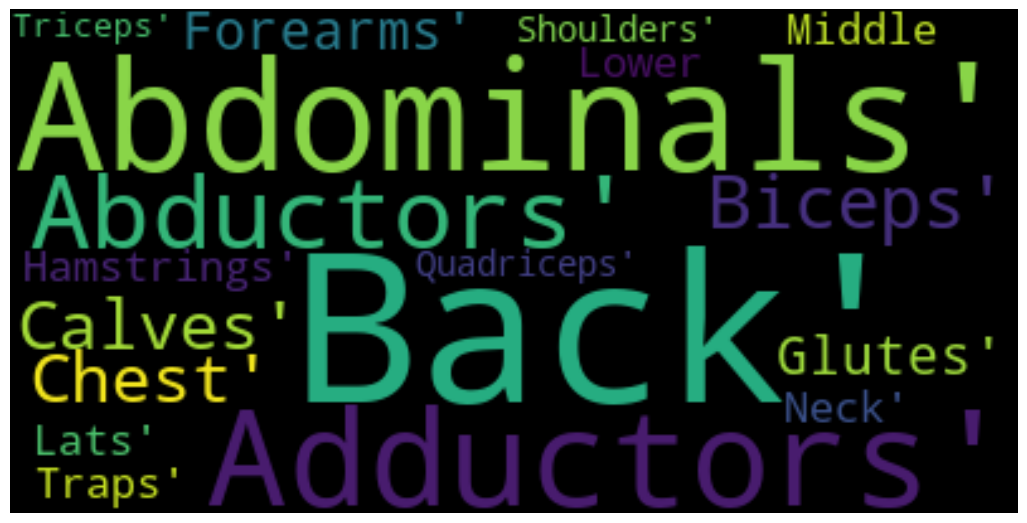

In [594]:
!pip install wordcloud

text = gym_data["BodyPart"].unique()

wordcloud = WordCloud(max_words=1000000,background_color="black").generate(str(text))
plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

Based off this, the bodypart targetted the most is Back, Abdominals, Adductors, Abductors, Biceps, Calves and Chest.

In [596]:
ratingSorted= gym_data.sort_values(by='Rating',ascending=False)
ratingSorted =ratingSorted.head(10)
ratingSorted

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
2065,2065,Single-Leg Press,The single-leg leg press is an exercise target...,Strength,Quadriceps,Machine,Intermediate,9.6,Average
1195,1195,Rickshaw Carry,NaN,Strongman,Forearms,Other,Beginner,9.6,Average
1179,1179,Palms-down wrist curl over bench,The palms-down wrist curl over bench is an exe...,Strength,Forearms,Barbell,Intermediate,9.5,Average
2525,2525,Dumbbell front raise to lateral raise,The dumbbell front raise to lateral raise is a...,Strength,Shoulders,Dumbbell,Intermediate,9.5,Average
1577,1577,Atlas Stones,NaN,Strongman,Lower Back,Other,Intermediate,9.5,Average
731,731,Incline Hammer Curls,NaN,Strength,Biceps,Dumbbell,Beginner,9.5,Average
88,88,Landmine twist,The landmine twist is a rotational abdominal m...,Strength,Abdominals,Other,Intermediate,9.5,Average
1798,1798,Clean from Blocks,NaN,Olympic Weightlifting,Quadriceps,Barbell,Beginner,9.5,Average
1451,1451,Weighted pull-up,The weighted pull-up is a more advanced variat...,Strength,Lats,Other,Intermediate,9.5,Average
1695,1695,T-Bar Row with Handle,NaN,Strength,Middle Back,Other,Intermediate,9.5,Average


Going off rating, the top 3 rated exercises are Single Leg-Press, Rickshaw Carry and Palms-down wrist curl over bench. It's surprising to seee that there are 2 forearm exercises in the top 3 since forearms are usually not prioritised to be trained separately. 

I will be picking to see the top rated exercises from powerlifting, cardio and strength as these are the main 3 different types of training forms that people who gym use.

### **Top Rated Powerlifting Exercises**

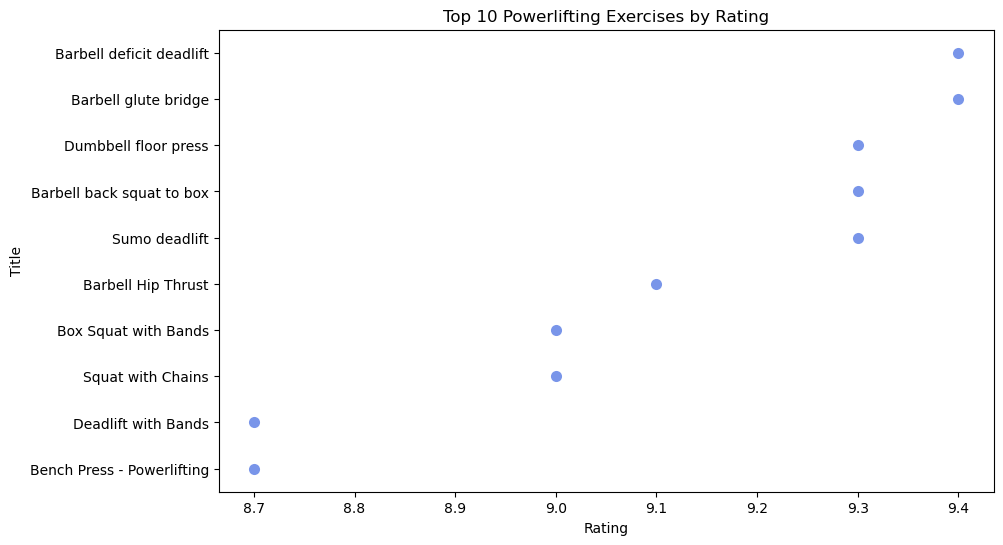

In [600]:
#dot plot
ratingSorted = gym_data[gym_data['Type'] == 'Powerlifting'].sort_values(by='Rating', ascending=False)
ratingSorted = ratingSorted.head(10)

plt.figure(figsize=(10, 6))

sns.stripplot(
    data=ratingSorted,
    x='Rating',
    y='Title',
    color='royalblue',
    alpha=0.7,
    size=8 
)

plt.title('Top 10 Powerlifting Exercises by Rating')
plt.xlabel('Rating')
plt.ylabel('Title')
plt.show()

The top 3 rated Powerlifting exercises are Barbell deficit deadlift, Barbell glute bridge and Dumbbell floor press.

### **Top Rated Cardio Exercises**

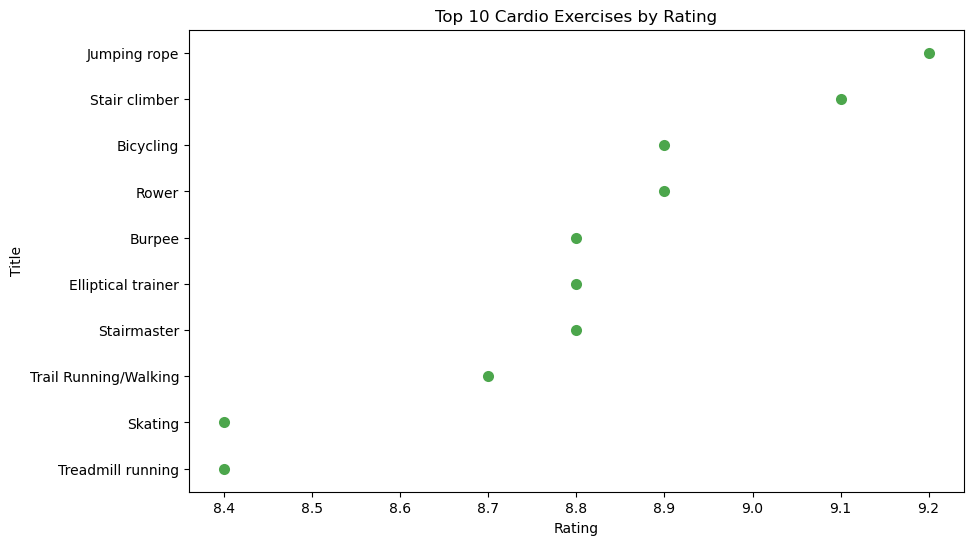

In [603]:
ratingSorted = gym_data[gym_data['Type'] == 'Cardio'].sort_values(by='Rating', ascending=False)
ratingSorted = ratingSorted.head(10)

plt.figure(figsize=(10, 6))

sns.stripplot(
    data=ratingSorted,
    x='Rating',
    y='Title',
    color='green',
    alpha=0.7,
    size=8 
)

plt.title('Top 10 Cardio Exercises by Rating')
plt.xlabel('Rating')
plt.ylabel('Title')
plt.show()

The top 3 highest rated exercises in Cardio are Jumping rope, Stair Climber and Bicycling.

### **Top Rated Strength Exercises**

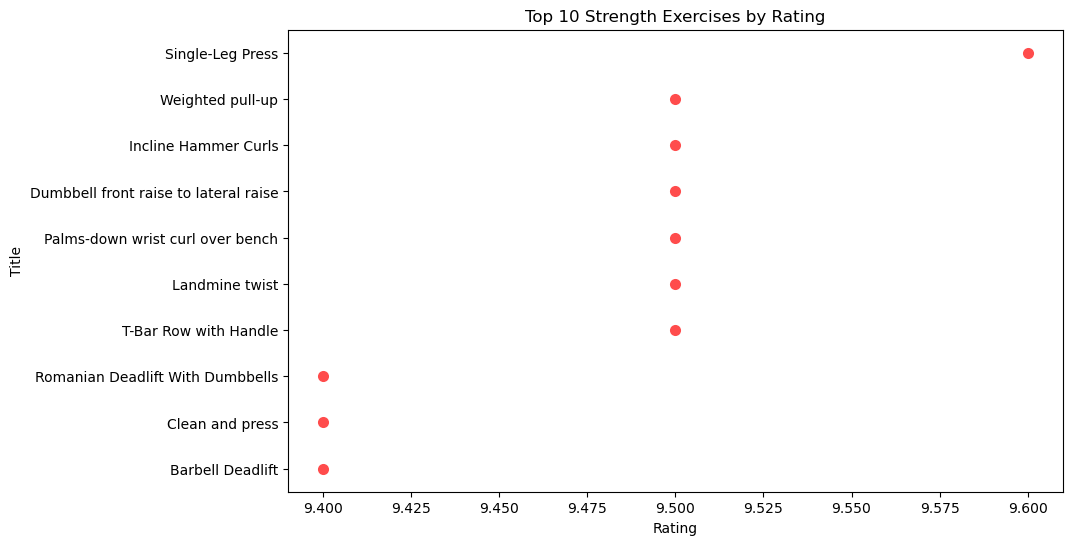

In [606]:
ratingSorted = gym_data[gym_data['Type'] == 'Strength'].sort_values(by='Rating', ascending=False)
ratingSorted = ratingSorted.head(10)

plt.figure(figsize=(10, 6))

sns.stripplot(
    data=ratingSorted,
    x='Rating',
    y='Title',
    color='red',
    alpha=0.7,
    size=8 
)

plt.title('Top 10 Strength Exercises by Rating')
plt.xlabel('Rating')
plt.ylabel('Title')
plt.show()

The results for top rated exercises for strength based exercise form is unique when compared to the other two results. Many of them have a similar rating which makes it difficult to pick our the top 3 exercises. However, the highest rated exercise is Single-Leg Press which has a clear distinction.

### **Percentage of exercises based off Level of Difficulty**

In [609]:
level_counts=gym_data.groupby(['Level']).count()
level_counts

,index,Title,Desc,Type,BodyPart,Equipment,Rating,RatingDesc
Level,,,,,,,,
Beginner,459,459,108,459,459,434,459,369
Expert,13,13,10,13,13,13,7,7
Intermediate,2446,2446,1250,2446,2446,2439,565,486


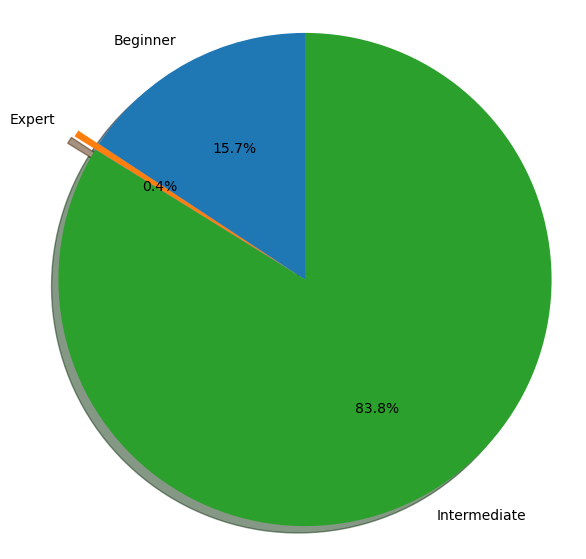

<Figure size 100x100 with 0 Axes>

In [610]:
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.pie(level_counts.Title, explode=explode, labels=level_counts.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.figure(figsize=(1,1))

plt.show()

There is a large amount of exercises that can be done by people with an intermediate level of fitness which can be see from the pie chart that shows 83.8%. 

### **Best Exercises to target Quadriceps**

Quadriceps are one of the biggest muscle groups in the body which make it more difficult to build muscle mass there. Hence, let's analyse the best exercises for the quads.

In [614]:
leg_exer= gym_data[gym_data['BodyPart']=='Quadriceps'].sort_values(by='Rating',ascending=False)
leg_exer_best =leg_exer[leg_exer['Type']=='Strength'].head(5)
leg_exer_best

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
2065,2065,Single-Leg Press,The single-leg leg press is an exercise target...,Strength,Quadriceps,Machine,Intermediate,9.6,Average
1799,1799,Barbell Full Squat,The barbell back squat is a popular compound m...,Strength,Quadriceps,Barbell,Intermediate,9.4,Average
1804,1804,Barbell walking lunge,The barbell walking lunge tests your ability t...,Strength,Quadriceps,Barbell,Intermediate,9.2,Average
1872,1872,Front Squats With Two Kettlebells,NaN,Strength,Quadriceps,Kettlebells,Beginner,9.2,Average
1873,1873,Kettlebell Pistol Squat,NaN,Strength,Quadriceps,Kettlebells,Beginner,9.1,Average


In [615]:
leg_exer_worst= gym_data[gym_data['BodyPart']=='Quadriceps'].sort_values(by='Rating',ascending=True)
leg_exer_worst =leg_exer_worst[leg_exer_worst['Type']=='Strength'].head(5)
leg_exer_worst

,index,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
2152,2152,Thigh killa,The thigh killa is a challenging lower-body bo...,Strength,Quadriceps,Body Only,Intermediate,0.0,NaN
2083,2083,Leverage Deadlift,NaN,Strength,Quadriceps,Machine,Beginner,0.0,NaN
2029,2029,Barbell Squat To A Box,NaN,Strength,Quadriceps,Other,Beginner,0.0,NaN
2027,2027,Single-leg knee-tap squat,The single-leg knee-tap squat is a single-leg ...,Strength,Quadriceps,Other,Intermediate,0.0,Average
2016,2016,Dumbbell walking lunge-,The dumbbell walking lunge is a popular lower-...,Strength,Quadriceps,Other,Intermediate,0.0,Average


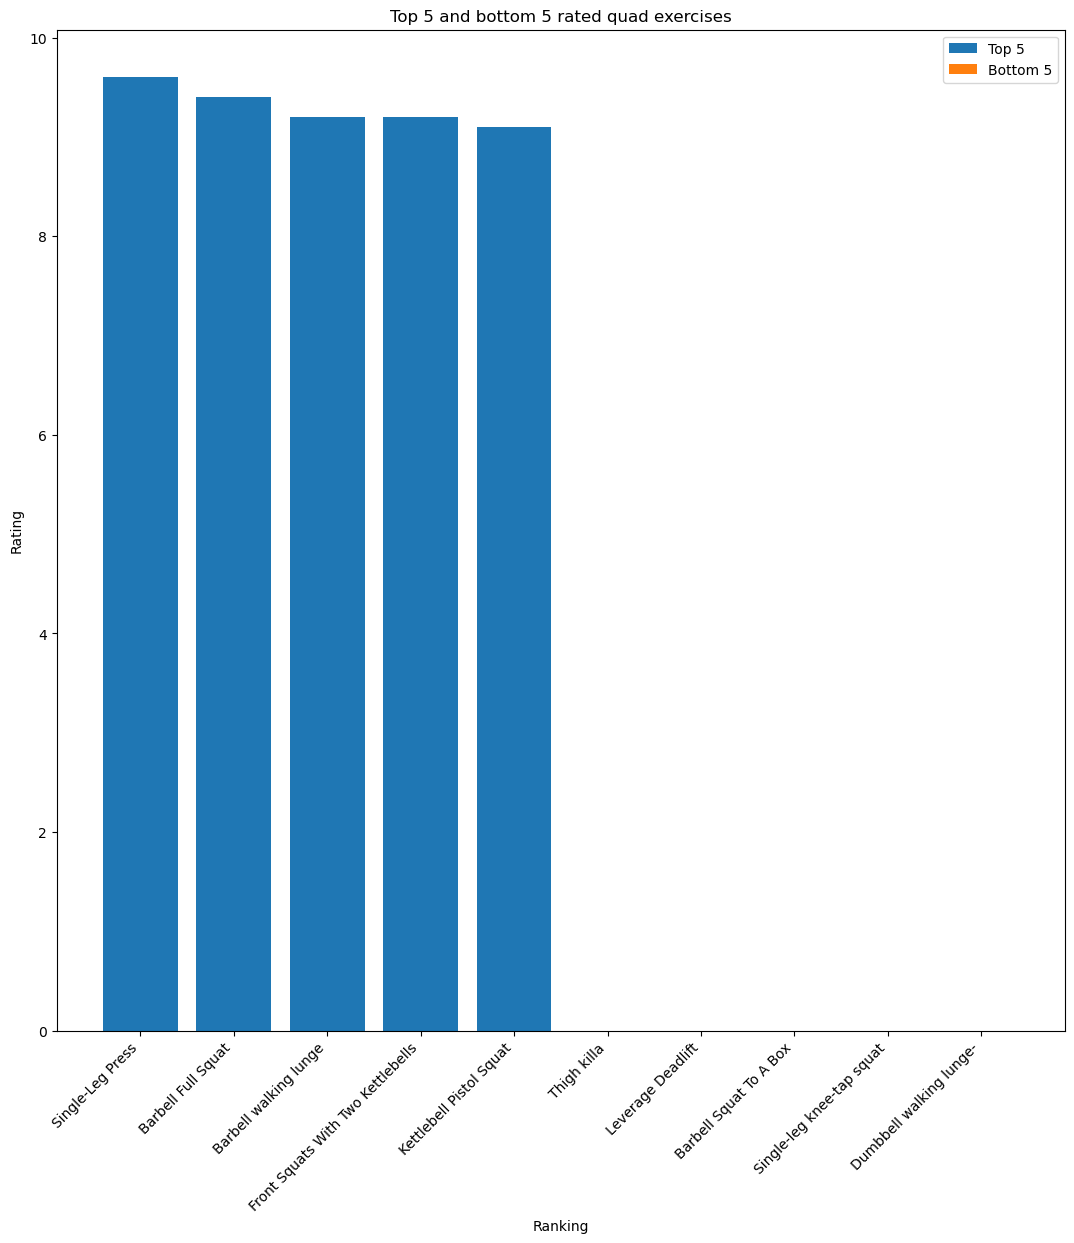

In [616]:
plt.bar(leg_exer_best.Title,leg_exer_best.Rating, label = 'Top 5')
plt.bar(leg_exer_worst.Title,leg_exer_worst.Rating, label = 'Bottom 5')
plt.xticks(rotation=45, ha='right')
 
plt.xlabel("Ranking")
plt.ylabel("Rating")
plt.title("Top 5 and bottom 5 rated quad exercises")
plt.legend()
plt.show()

This shows that the top 3 exercises for the Quadriceps are Single-Leg Press, Barbell Full Squat and Barbell walking lunge, where the top exercise is Single-leg Press.

### **Best Exercises to target Back**

Since we have looked at one of the largest muscle groups in the lower body, one of the largest muscle group in the upper body is the Back, which consists of the Lats, Lower Back and Middle Back. This is also the reason that many people struggle to get a pull-up since it takes a longer time to build the back to be strong enough execute the pull-up.

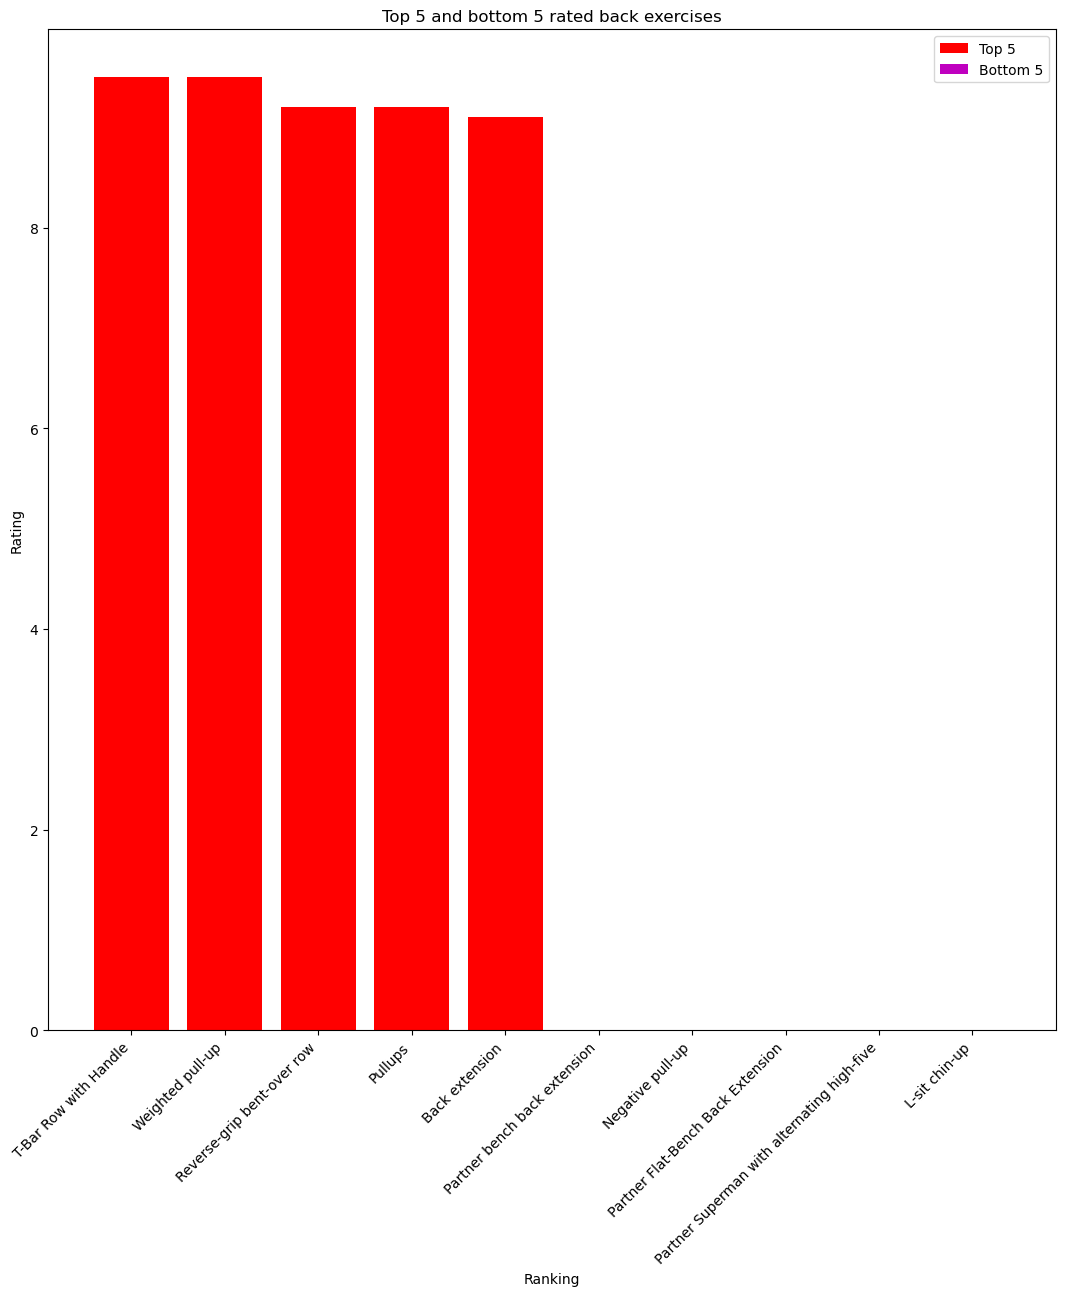

In [620]:
options = ['Lats','Lower Back','Middle Back']
back_exer= gym_data[gym_data['BodyPart'].isin(options)].sort_values(by='Rating',ascending=False)
back_exer_best =back_exer[back_exer['Type']=='Strength'].head(5)

back_exer_worst= gym_data[gym_data['BodyPart'].isin(options)].sort_values(by='Rating',ascending=True)
back_exer_worst =back_exer_worst[back_exer_worst['Type']=='Strength'].head(5)

     
plt.bar(back_exer_best.Title,back_exer_best.Rating,color='r', label = 'Top 5')
plt.bar(back_exer_worst.Title,back_exer_worst.Rating,color='m', label = 'Bottom 5')
plt.xticks(rotation=45, ha='right')
 
plt.xlabel("Ranking")
plt.ylabel("Rating")
plt.title("Top 5 and bottom 5 rated back exercises")
plt.legend()
plt.show()

The top 3 exercises for the Back are T-Bar row with Handle, Weighted pull-up followed by Reverse-grip bent-over row. For people who are not yet able to do pull-ups, they have other exercises to focus on to build their strength. 

## **Conclusion**
In conclusion, this analysis utilizes a publicly available Kaggle dataset to delve into the world of gym workouts, offering valuable insights into various aspects of fitness routines. Through detailed exploration, we have identified key relationships, such as the most effective exercises for specific target muscle groups and the range of options available for beginners with limited equipment. These findings are designed to assist gym-goers in optimizing their workout plans, enabling them to make informed decisions about exercises that align with their goals. Overall, this analysis provides a deeper understanding of gym workouts and contributes to more efficient and targeted fitness planning.